<a href="https://colab.research.google.com/github/NexxZ-ops/nexxz-commerce/blob/main/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🤖 IA ASESOR FINANCIERO - SISTEMA COMPLETO DE ANÁLISIS
Powered by: Python, Scikit-learn, TensorFlow, Pandas, NumPy

📊 PASO 1: CARGA DE DATOS FINANCIEROS
✅ Datos financieros generados: 365 días
📊 Rango de fechas: 2023-01-01 a 2023-12-31

📈 PASO 2: CÁLCULO DE MÉTRICAS FINANCIERAS

📊 ANÁLISIS DE MÉTRICAS FINANCIERAS CLAVE

💰 MÉTRICAS DE PRECIO Y RENDIMIENTO:
   Precio Actual: $91.39
   Retorno Total: -8.61%
   Rango: $64.62 - $107.53

📈 MÉTRICAS DE RIESGO:
   Volatilidad Anualizada: 31.26%
   Sharpe Ratio: -0.108
   Máxima Caída (Drawdown): -39.89%
   VaR (95%): $-3.01

💼 MÉTRICAS OPERACIONALES:
   Ingresos Totales: $36,089,712.47
   Gastos Totales: $23,675,406.45
   Beneficio Neto: $12,414,306.02
   Margen de Beneficio: 34.40%
   ROI: 109.19%

📊 PASO 3: VISUALIZACIÓN DE DATOS

✅ Visualización guardada: 'financial_overview.png'


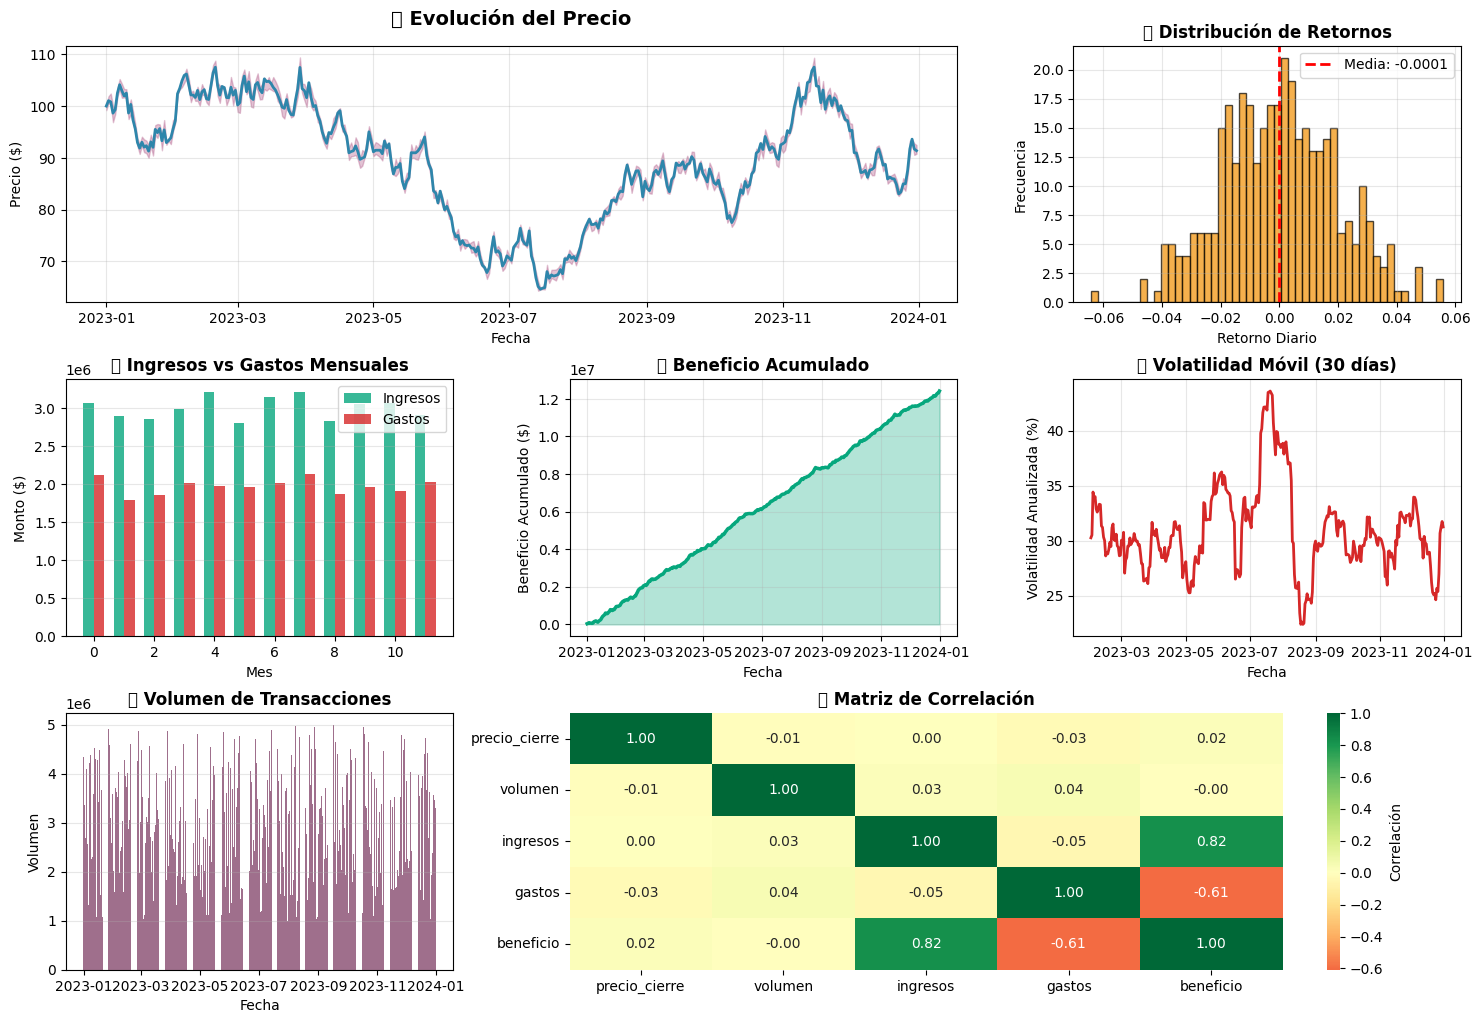


⚠️  PASO 4: ANÁLISIS DE RIESGOS

⚠️  ANÁLISIS DE RIESGOS Y DETECCIÓN DE ANOMALÍAS

🔍 Anomalías detectadas: 19
   Últimas 5 fechas anómalas: ['2023-07-26', '2023-07-31', '2023-08-30', '2023-08-31', '2023-12-28']

🔴 NIVEL DE RIESGO (Volatilidad): ALTO
📊 Calificación Sharpe Ratio: POBRE
📉 ⚠️ CRÍTICO: Pérdida máxima supera 30%
💼 ✅ Margen saludable

🤖 PASO 5: PREDICCIONES CON MACHINE LEARNING

🤖 PREDICCIÓN DE PRECIOS CON MACHINE LEARNING

🔄 Entrenando Random Forest...
   RMSE: $1.60
   MAE: $1.28
   R²: 0.9404

🔄 Entrenando Gradient Boosting...
   RMSE: $1.35
   MAE: $1.13
   R²: 0.9574

🔄 Entrenando Ridge Regression...
   RMSE: $1.41
   MAE: $1.15
   R²: 0.9536

🔮 Generando predicciones para los próximos 30 días...

✅ Predicciones guardadas: 'price_predictions.png'


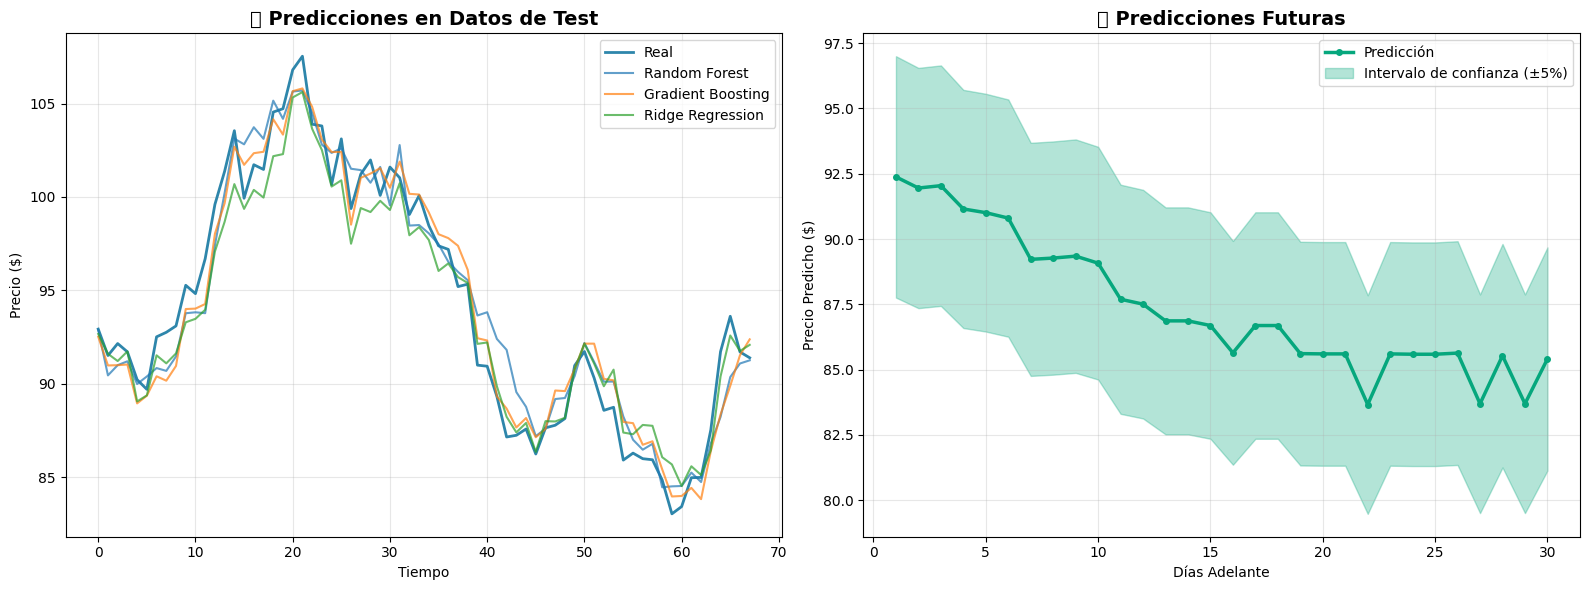


🏆 MEJOR MODELO: Gradient Boosting (RMSE: $1.35)

🧠 PASO 6: PREDICCIONES CON DEEP LEARNING (LSTM)

🧠 PREDICCIÓN CON DEEP LEARNING (LSTM)

🔄 Entrenando red LSTM...

✅ Modelo LSTM entrenado
   RMSE: $3.82
   MAE: $3.25
🔮 Predicciones LSTM generadas para 30 días

💎 PASO 7: DETECCIÓN DE OPORTUNIDADES

💎 DETECCIÓN DE OPORTUNIDADES DE INVERSIÓN

✨ Se detectaron 2 oportunidades:

⚡ 1. ALTA VOLATILIDAD [MEDIA]
   Volatilidad elevada, potencial para trading
   → ESTRATEGIA DE TRADING ACTIVO

💼 2. MARGEN SALUDABLE [ALTA]
   Margen de beneficio del 34.4%
   → FUNDAMENTALES SÓLIDOS


🎯 PASO 8: GENERACIÓN DE RECOMENDACIONES

🎯 RECOMENDACIONES DEL ASESOR FINANCIERO IA

📋 RECOMENDACIONES PERSONALIZADAS:

🔵 💰 GESTIÓN DE LIQUIDEZ [MANTENIMIENTO]
   Excelente gestión de liquidez

   Acciones recomendadas:
   • Mantener disciplina financiera
   • Considerar inversiones con el excedente
   • Diversificar fuentes de ingresos

🟠 ⚖️ GESTIÓN DE RIESGO [ALTA]
   Alta volatilidad detectada - Ajustar estrategia


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, IsolationForest
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Para Deep Learning
try:
    from tensorflow import keras
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU
    TENSORFLOW_AVAILABLE = True
except ImportError:
    TENSORFLOW_AVAILABLE = False
    print("⚠️ TensorFlow no disponible. Usando solo modelos de Scikit-learn")


class FinancialAIAdvisor:
    """
    IA Asesor Financiero Inteligente con Machine Learning
    """

    def __init__(self):
        self.data = None
        self.financial_metrics = {}
        self.predictions = {}
        self.recommendations = []
        self.risk_analysis = {}
        self.scaler = MinMaxScaler()

    # ============== CARGA Y PREPARACIÓN DE DATOS ==============

    def load_financial_data(self, filepath=None, data=None):
        """
        Carga datos financieros desde CSV o DataFrame
        """
        if filepath:
            self.data = pd.read_csv(filepath)
            print(f"✅ Datos cargados desde archivo: {filepath}")
        elif data is not None:
            self.data = data.copy()
            print("✅ Datos cargados desde DataFrame")
        else:
            print("❌ Debe proporcionar un archivo o DataFrame")
            return None

        # Convertir fecha si existe
        if 'fecha' in self.data.columns or 'date' in self.data.columns:
            date_col = 'fecha' if 'fecha' in self.data.columns else 'date'
            self.data[date_col] = pd.to_datetime(self.data[date_col])
            self.data = self.data.sort_values(date_col)

        print(f"📊 Dimensiones: {self.data.shape}")
        print(f"📋 Columnas: {list(self.data.columns)}")
        return self.data

    def generate_sample_financial_data(self, n_days=365):
        """
        Genera datos financieros sintéticos realistas
        """
        np.random.seed(42)

        # Generar fechas
        dates = pd.date_range(start='2023-01-01', periods=n_days, freq='D')

        # Simular datos financieros realistas
        base_price = 100
        prices = [base_price]
        volumes = []

        for i in range(1, n_days):
            # Precio con tendencia alcista y volatilidad
            daily_return = np.random.normal(0.0005, 0.02)
            trend = 0.0003 * np.sin(i / 30)  # Tendencia estacional
            new_price = prices[-1] * (1 + daily_return + trend)
            prices.append(new_price)

            # Volumen correlacionado con volatilidad
            volume = np.random.randint(1000000, 5000000)
            volumes.append(volume)

        volumes.insert(0, np.random.randint(1000000, 5000000))

        # Crear DataFrame
        self.data = pd.DataFrame({
            'fecha': dates,
            'precio_cierre': prices,
            'precio_apertura': [p * (1 + np.random.uniform(-0.01, 0.01)) for p in prices],
            'precio_maximo': [p * (1 + np.random.uniform(0, 0.02)) for p in prices],
            'precio_minimo': [p * (1 - np.random.uniform(0, 0.02)) for p in prices],
            'volumen': volumes,
            'ingresos': [np.random.uniform(50000, 150000) for _ in range(n_days)],
            'gastos': [np.random.uniform(30000, 100000) for _ in range(n_days)],
            'inversiones': [np.random.uniform(10000, 50000) for _ in range(n_days)]
        })

        # Calcular campos derivados
        self.data['beneficio'] = self.data['ingresos'] - self.data['gastos']
        self.data['retorno_diario'] = self.data['precio_cierre'].pct_change()

        print(f"✅ Datos financieros generados: {n_days} días")
        print(f"📊 Rango de fechas: {dates[0].date()} a {dates[-1].date()}")
        return self.data

    # ============== ANÁLISIS EXPLORATORIO FINANCIERO ==============

    def calculate_financial_metrics(self):
        """
        Calcula métricas financieras clave
        """
        print("\n" + "="*70)
        print("📊 ANÁLISIS DE MÉTRICAS FINANCIERAS CLAVE")
        print("="*70)

        metrics = {}

        # Métricas de precio y rendimiento
        if 'precio_cierre' in self.data.columns:
            current_price = self.data['precio_cierre'].iloc[-1]
            initial_price = self.data['precio_cierre'].iloc[0]

            metrics['precio_actual'] = current_price
            metrics['precio_inicial'] = initial_price
            metrics['retorno_total'] = ((current_price - initial_price) / initial_price) * 100
            metrics['precio_maximo'] = self.data['precio_cierre'].max()
            metrics['precio_minimo'] = self.data['precio_cierre'].min()

        # Retornos y volatilidad
        if 'retorno_diario' in self.data.columns:
            returns = self.data['retorno_diario'].dropna()
            metrics['retorno_promedio_diario'] = returns.mean() * 100
            metrics['volatilidad_diaria'] = returns.std() * 100
            metrics['volatilidad_anualizada'] = returns.std() * np.sqrt(252) * 100

            # Sharpe Ratio (asumiendo tasa libre de riesgo = 2%)
            risk_free_rate = 0.02 / 252
            excess_returns = returns - risk_free_rate
            metrics['sharpe_ratio'] = (excess_returns.mean() / returns.std()) * np.sqrt(252) if returns.std() != 0 else 0

            # Maximum Drawdown
            cumulative = (1 + returns).cumprod()
            running_max = cumulative.expanding().max()
            drawdown = (cumulative - running_max) / running_max
            metrics['max_drawdown'] = drawdown.min() * 100

        # Métricas operacionales
        if 'ingresos' in self.data.columns and 'gastos' in self.data.columns:
            metrics['ingresos_totales'] = self.data['ingresos'].sum()
            metrics['gastos_totales'] = self.data['gastos'].sum()
            metrics['beneficio_neto'] = metrics['ingresos_totales'] - metrics['gastos_totales']
            metrics['margen_beneficio'] = (metrics['beneficio_neto'] / metrics['ingresos_totales']) * 100
            metrics['promedio_ingresos_diarios'] = self.data['ingresos'].mean()
            metrics['promedio_gastos_diarios'] = self.data['gastos'].mean()

        # ROI
        if 'inversiones' in self.data.columns and 'beneficio' in self.data.columns:
            total_investment = self.data['inversiones'].sum()
            total_profit = self.data['beneficio'].sum()
            metrics['roi'] = (total_profit / total_investment) * 100 if total_investment > 0 else 0

        # VaR (Value at Risk) - 95% confianza
        if 'retorno_diario' in self.data.columns:
            returns = self.data['retorno_diario'].dropna()
            metrics['var_95'] = np.percentile(returns, 5) * current_price if 'precio_cierre' in self.data.columns else 0

        self.financial_metrics = metrics

        # Imprimir métricas
        print("\n💰 MÉTRICAS DE PRECIO Y RENDIMIENTO:")
        if 'precio_actual' in metrics:
            print(f"   Precio Actual: ${metrics['precio_actual']:.2f}")
            print(f"   Retorno Total: {metrics['retorno_total']:.2f}%")
            print(f"   Rango: ${metrics['precio_minimo']:.2f} - ${metrics['precio_maximo']:.2f}")

        print("\n📈 MÉTRICAS DE RIESGO:")
        if 'volatilidad_anualizada' in metrics:
            print(f"   Volatilidad Anualizada: {metrics['volatilidad_anualizada']:.2f}%")
            print(f"   Sharpe Ratio: {metrics['sharpe_ratio']:.3f}")
            print(f"   Máxima Caída (Drawdown): {metrics['max_drawdown']:.2f}%")
            print(f"   VaR (95%): ${metrics['var_95']:.2f}")

        print("\n💼 MÉTRICAS OPERACIONALES:")
        if 'ingresos_totales' in metrics:
            print(f"   Ingresos Totales: ${metrics['ingresos_totales']:,.2f}")
            print(f"   Gastos Totales: ${metrics['gastos_totales']:,.2f}")
            print(f"   Beneficio Neto: ${metrics['beneficio_neto']:,.2f}")
            print(f"   Margen de Beneficio: {metrics['margen_beneficio']:.2f}%")

        if 'roi' in metrics:
            print(f"   ROI: {metrics['roi']:.2f}%")

        return metrics

    def visualize_financial_overview(self):
        """
        Crea visualizaciones completas del análisis financiero
        """
        fig = plt.figure(figsize=(18, 12))
        gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

        # 1. Evolución del precio
        ax1 = fig.add_subplot(gs[0, :2])
        ax1.plot(self.data['fecha'], self.data['precio_cierre'], linewidth=2, color='#2E86AB')
        ax1.fill_between(self.data['fecha'], self.data['precio_minimo'], self.data['precio_maximo'],
                         alpha=0.3, color='#A23B72')
        ax1.set_title('📈 Evolución del Precio', fontsize=14, fontweight='bold', pad=15)
        ax1.set_xlabel('Fecha')
        ax1.set_ylabel('Precio ($)')
        ax1.grid(True, alpha=0.3)

        # 2. Distribución de retornos
        ax2 = fig.add_subplot(gs[0, 2])
        returns = self.data['retorno_diario'].dropna()
        ax2.hist(returns, bins=50, edgecolor='black', alpha=0.7, color='#F18F01')
        ax2.axvline(returns.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {returns.mean():.4f}')
        ax2.set_title('📊 Distribución de Retornos', fontsize=12, fontweight='bold')
        ax2.set_xlabel('Retorno Diario')
        ax2.set_ylabel('Frecuencia')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. Ingresos vs Gastos
        ax3 = fig.add_subplot(gs[1, 0])
        x = np.arange(len(self.data.groupby(self.data['fecha'].dt.to_period('M'))))
        monthly_income = self.data.groupby(self.data['fecha'].dt.to_period('M'))['ingresos'].sum()
        monthly_expenses = self.data.groupby(self.data['fecha'].dt.to_period('M'))['gastos'].sum()
        width = 0.35
        ax3.bar(x - width/2, monthly_income, width, label='Ingresos', color='#06A77D', alpha=0.8)
        ax3.bar(x + width/2, monthly_expenses, width, label='Gastos', color='#D62828', alpha=0.8)
        ax3.set_title('💰 Ingresos vs Gastos Mensuales', fontsize=12, fontweight='bold')
        ax3.set_xlabel('Mes')
        ax3.set_ylabel('Monto ($)')
        ax3.legend()
        ax3.grid(True, alpha=0.3, axis='y')

        # 4. Beneficio acumulado
        ax4 = fig.add_subplot(gs[1, 1])
        cumulative_profit = self.data['beneficio'].cumsum()
        ax4.plot(self.data['fecha'], cumulative_profit, linewidth=2.5, color='#06A77D')
        ax4.fill_between(self.data['fecha'], 0, cumulative_profit, alpha=0.3, color='#06A77D')
        ax4.set_title('📊 Beneficio Acumulado', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Fecha')
        ax4.set_ylabel('Beneficio Acumulado ($)')
        ax4.grid(True, alpha=0.3)

        # 5. Volatilidad móvil
        ax5 = fig.add_subplot(gs[1, 2])
        rolling_vol = self.data['retorno_diario'].rolling(window=30).std() * np.sqrt(252) * 100
        ax5.plot(self.data['fecha'], rolling_vol, linewidth=2, color='#D62828')
        ax5.set_title('📉 Volatilidad Móvil (30 días)', fontsize=12, fontweight='bold')
        ax5.set_xlabel('Fecha')
        ax5.set_ylabel('Volatilidad Anualizada (%)')
        ax5.grid(True, alpha=0.3)

        # 6. Volumen de transacciones
        ax6 = fig.add_subplot(gs[2, 0])
        ax6.bar(self.data['fecha'], self.data['volumen'], color='#5F0F40', alpha=0.6)
        ax6.set_title('📦 Volumen de Transacciones', fontsize=12, fontweight='bold')
        ax6.set_xlabel('Fecha')
        ax6.set_ylabel('Volumen')
        ax6.grid(True, alpha=0.3, axis='y')

        # 7. Correlación entre variables
        ax7 = fig.add_subplot(gs[2, 1:])
        correlation_cols = ['precio_cierre', 'volumen', 'ingresos', 'gastos', 'beneficio']
        available_cols = [col for col in correlation_cols if col in self.data.columns]
        if available_cols:
            corr_matrix = self.data[available_cols].corr()
            sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0,
                       ax=ax7, cbar_kws={'label': 'Correlación'})
            ax7.set_title('🔗 Matriz de Correlación', fontsize=12, fontweight='bold')

        plt.savefig('financial_overview.png', dpi=300, bbox_inches='tight')
        print("\n✅ Visualización guardada: 'financial_overview.png'")
        plt.show()

    # ============== DETECCIÓN DE RIESGOS Y ANOMALÍAS ==============

    def detect_risks_and_anomalies(self):
        """
        Detecta riesgos financieros y anomalías usando ML
        """
        print("\n" + "="*70)
        print("⚠️  ANÁLISIS DE RIESGOS Y DETECCIÓN DE ANOMALÍAS")
        print("="*70)

        risks = {}

        # Preparar features para detección de anomalías
        features = ['precio_cierre', 'volumen', 'retorno_diario']
        available_features = [f for f in features if f in self.data.columns]

        if len(available_features) >= 2:
            X = self.data[available_features].fillna(0)

            # Isolation Forest para detección de anomalías
            iso_forest = IsolationForest(contamination=0.05, random_state=42)
            anomalies = iso_forest.fit_predict(X)

            anomaly_dates = self.data.loc[anomalies == -1, 'fecha'].tolist()
            risks['anomalias_detectadas'] = len(anomaly_dates)
            risks['fechas_anomalias'] = [d.strftime('%Y-%m-%d') for d in anomaly_dates[-5:]]

            print(f"\n🔍 Anomalías detectadas: {len(anomaly_dates)}")
            if anomaly_dates:
                print(f"   Últimas 5 fechas anómalas: {risks['fechas_anomalias']}")

        # Análisis de riesgos basado en métricas
        if self.financial_metrics:
            metrics = self.financial_metrics

            # Clasificación de riesgo por volatilidad
            vol = metrics.get('volatilidad_anualizada', 0)
            if vol < 15:
                risks['nivel_riesgo_volatilidad'] = "BAJO"
                risks['color_riesgo'] = "🟢"
            elif vol < 25:
                risks['nivel_riesgo_volatilidad'] = "MEDIO"
                risks['color_riesgo'] = "🟡"
            else:
                risks['nivel_riesgo_volatilidad'] = "ALTO"
                risks['color_riesgo'] = "🔴"

            # Sharpe Ratio
            sharpe = metrics.get('sharpe_ratio', 0)
            if sharpe > 1.5:
                risks['calificacion_sharpe'] = "EXCELENTE"
            elif sharpe > 1:
                risks['calificacion_sharpe'] = "BUENO"
            elif sharpe > 0.5:
                risks['calificacion_sharpe'] = "ACEPTABLE"
            else:
                risks['calificacion_sharpe'] = "POBRE"

            # Drawdown
            drawdown = metrics.get('max_drawdown', 0)
            if abs(drawdown) > 30:
                risks['alerta_drawdown'] = "⚠️ CRÍTICO: Pérdida máxima supera 30%"
            elif abs(drawdown) > 20:
                risks['alerta_drawdown'] = "⚠️ ALTO: Pérdida máxima supera 20%"
            else:
                risks['alerta_drawdown'] = "✅ Aceptable"

            # Margen de beneficio
            if 'margen_beneficio' in metrics:
                margin = metrics['margen_beneficio']
                if margin < 10:
                    risks['alerta_margen'] = "⚠️ Margen bajo, revisar estructura de costos"
                elif margin > 30:
                    risks['alerta_margen'] = "✅ Margen saludable"
                else:
                    risks['alerta_margen'] = "✓ Margen aceptable"

        self.risk_analysis = risks

        # Imprimir análisis
        print(f"\n{risks.get('color_riesgo', '⚪')} NIVEL DE RIESGO (Volatilidad): {risks.get('nivel_riesgo_volatilidad', 'N/A')}")
        print(f"📊 Calificación Sharpe Ratio: {risks.get('calificacion_sharpe', 'N/A')}")
        print(f"📉 {risks.get('alerta_drawdown', 'N/A')}")
        if 'alerta_margen' in risks:
            print(f"💼 {risks.get('alerta_margen', 'N/A')}")

        return risks

    # ============== PREDICCIONES CON MACHINE LEARNING ==============

    def predict_prices_ml(self, days_ahead=30):
        """
        Predice precios futuros usando modelos de Machine Learning
        """
        print("\n" + "="*70)
        print("🤖 PREDICCIÓN DE PRECIOS CON MACHINE LEARNING")
        print("="*70)

        if 'precio_cierre' not in self.data.columns:
            print("❌ No hay columna de precio para predecir")
            return None

        # Preparar features
        df = self.data.copy()

        # Crear features técnicos
        df['ma_7'] = df['precio_cierre'].rolling(window=7).mean()
        df['ma_30'] = df['precio_cierre'].rolling(window=30).mean()
        df['volatility'] = df['retorno_diario'].rolling(window=7).std()
        df['momentum'] = df['precio_cierre'] - df['precio_cierre'].shift(5)
        df['rsi'] = self._calculate_rsi(df['precio_cierre'])

        df = df.dropna()

        # Features y target
        feature_cols = ['ma_7', 'ma_30', 'volatility', 'momentum', 'rsi', 'volumen']
        X = df[feature_cols].values
        y = df['precio_cierre'].values

        # Split temporal
        split_idx = int(len(X) * 0.8)
        X_train, X_test = X[:split_idx], X[split_idx:]
        y_train, y_test = y[:split_idx], y[split_idx:]

        # Normalizar
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)

        # Entrenar modelos
        models = {
            'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
            'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
            'Ridge Regression': Ridge(alpha=1.0)
        }

        results = {}
        best_model = None
        best_score = float('inf')

        for name, model in models.items():
            print(f"\n🔄 Entrenando {name}...")
            model.fit(X_train_scaled, y_train)

            y_pred = model.predict(X_test_scaled)

            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            results[name] = {
                'model': model,
                'rmse': rmse,
                'mae': mae,
                'r2': r2,
                'predictions': y_pred
            }

            print(f"   RMSE: ${rmse:.2f}")
            print(f"   MAE: ${mae:.2f}")
            print(f"   R²: {r2:.4f}")

            if rmse < best_score:
                best_score = rmse
                best_model = model

        # Predicción futura
        print(f"\n🔮 Generando predicciones para los próximos {days_ahead} días...")

        last_features = X_test_scaled[-1].reshape(1, -1)
        future_predictions = []

        for _ in range(days_ahead):
            pred = best_model.predict(last_features)[0]
            future_predictions.append(pred)
            # Actualizar features (simplificado)
            last_features = last_features * 0.99 + np.random.normal(0, 0.01, last_features.shape)

        self.predictions['ml_models'] = results
        self.predictions['future_prices'] = future_predictions

        # Visualizar predicciones
        self._visualize_predictions(y_test, results, future_predictions, days_ahead)

        best_model_name = min(results, key=lambda x: results[x]['rmse'])
        print(f"\n🏆 MEJOR MODELO: {best_model_name} (RMSE: ${results[best_model_name]['rmse']:.2f})")

        return results, future_predictions

    def predict_prices_lstm(self, days_ahead=30, epochs=50):
        """
        Predice precios usando LSTM (Deep Learning)
        """
        if not TENSORFLOW_AVAILABLE:
            print("⚠️ TensorFlow no disponible, saltando LSTM")
            return None

        print("\n" + "="*70)
        print("🧠 PREDICCIÓN CON DEEP LEARNING (LSTM)")
        print("="*70)

        # Preparar datos
        prices = self.data['precio_cierre'].values.reshape(-1, 1)
        scaled_prices = self.scaler.fit_transform(prices)

        # Crear secuencias
        sequence_length = 60
        X, y = [], []

        for i in range(sequence_length, len(scaled_prices)):
            X.append(scaled_prices[i-sequence_length:i])
            y.append(scaled_prices[i])

        X, y = np.array(X), np.array(y)

        # Split temporal
        split = int(0.8 * len(X))
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]

        # Construir modelo LSTM
        model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(50, return_sequences=False),
            Dropout(0.2),
            Dense(25),
            Dense(1)
        ])

        model.compile(optimizer='adam', loss='mse', metrics=['mae'])

        print("\n🔄 Entrenando red LSTM...")
        history = model.fit(
            X_train, y_train,
            epochs=epochs,
            batch_size=32,
            validation_split=0.1,
            verbose=0
        )

        # Evaluar
        y_pred = model.predict(X_test, verbose=0)
        y_pred_original = self.scaler.inverse_transform(y_pred)
        y_test_original = self.scaler.inverse_transform(y_test)

        rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
        mae = mean_absolute_error(y_test_original, y_pred_original)

        print(f"\n✅ Modelo LSTM entrenado")
        print(f"   RMSE: ${rmse:.2f}")
        print(f"   MAE: ${mae:.2f}")

        # Predicción futura
        last_sequence = scaled_prices[-sequence_length:]
        future_predictions_lstm = []

        for _ in range(days_ahead):
            pred = model.predict(last_sequence.reshape(1, sequence_length, 1), verbose=0)
            future_predictions_lstm.append(self.scaler.inverse_transform(pred)[0][0])
            last_sequence = np.append(last_sequence[1:], pred)

        self.predictions['lstm'] = {
            'model': model,
            'rmse': rmse,
            'mae': mae,
            'future_prices': future_predictions_lstm,
            'history': history
        }

        print(f"🔮 Predicciones LSTM generadas para {days_ahead} días")

        return future_predictions_lstm

    def _calculate_rsi(self, prices, period=14):
        """Calcula RSI (Relative Strength Index)"""
        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi

    def _visualize_predictions(self, y_test, results, future_predictions, days_ahead):
        """Visualiza predicciones de modelos"""
        fig, axes = plt.subplots(1, 2, figsize=(16, 6))

        # Predicciones en test
        ax1 = axes[0]
        ax1.plot(y_test, label='Real', linewidth=2, color='#2E86AB')

        for name, result in results.items():
            ax1.plot(result['predictions'], label=f'{name}', alpha=0.7, linewidth=1.5)

        ax1.set_title('📊 Predicciones en Datos de Test', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Tiempo')
        ax1.set_ylabel('Precio ($)')
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        # Predicciones futuras
        ax2 = axes[1]
        future_days = list(range(1, days_ahead + 1))
        ax2.plot(future_days, future_predictions, marker='o', linewidth=2.5,
                markersize=4, color='#06A77D', label='Predicción')
        ax2.fill_between(future_days,
                         [p * 0.95 for p in future_predictions],
                         [p * 1.05 for p in future_predictions],
                         alpha=0.3, color='#06A77D', label='Intervalo de confianza (±5%)')
        ax2.set_title('🔮 Predicciones Futuras', fontsize=14, fontweight='bold')
        ax2.set_xlabel('Días Adelante')
        ax2.set_ylabel('Precio Predicho ($)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('price_predictions.png', dpi=300, bbox_inches='tight')
        print("\n✅ Predicciones guardadas: 'price_predictions.png'")
        plt.show()

    # ============== DETECCIÓN DE OPORTUNIDADES ==============

    def detect_investment_opportunities(self):
        """
        Detecta oportunidades de inversión usando clustering y análisis técnico
        """
        print("\n" + "="*70)
        print("💎 DETECCIÓN DE OPORTUNIDADES DE INVERSIÓN")
        print("="*70)

        opportunities = []

        # 1. Análisis de tendencia
        recent_prices = self.data['precio_cierre'].tail(30)
        trend = (recent_prices.iloc[-1] - recent_prices.iloc[0]) / recent_prices.iloc[0] * 100

        if trend > 5:
            opportunities.append({
                'tipo': 'TENDENCIA ALCISTA',
                'descripción': f'Tendencia alcista fuerte del {trend:.2f}% en últimos 30 días',
                'accion': 'CONSIDERAR COMPRA',
                'prioridad': 'ALTA' if trend > 10 else 'MEDIA',
                'icono': '📈'
            })
        elif trend < -5:
            opportunities.append({
                'tipo': 'OPORTUNIDAD DE ENTRADA',
                'descripción': f'Corrección del {abs(trend):.2f}%, posible punto de entrada',
                'accion': 'ANALIZAR COMPRA',
                'prioridad': 'MEDIA',
                'icono': '💰'
            })

        # 2. RSI (Sobrecompra/Sobreventa)
        rsi = self._calculate_rsi(self.data['precio_cierre']).iloc[-1]
        if rsi < 30:
            opportunities.append({
                'tipo': 'SOBREVENTA (RSI)',
                'descripción': f'RSI en {rsi:.1f}, activo sobrevend ido',
                'accion': 'OPORTUNIDAD DE COMPRA',
                'prioridad': 'ALTA',
                'icono': '🎯'
            })
        elif rsi > 70:
            opportunities.append({
                'tipo': 'SOBRECOMPRA (RSI)',
                'descripción': f'RSI en {rsi:.1f}, activo sobrecomprado',
                'accion': 'CONSIDERAR VENTA/TOMA DE GANANCIAS',
                'prioridad': 'MEDIA',
                'icono': '⚠️'
            })

        # 3. Volatilidad
        if self.financial_metrics.get('volatilidad_anualizada', 0) > 30:
            opportunities.append({
                'tipo': 'ALTA VOLATILIDAD',
                'descripción': 'Volatilidad elevada, potencial para trading',
                'accion': 'ESTRATEGIA DE TRADING ACTIVO',
                'prioridad': 'MEDIA',
                'icono': '⚡'
            })

        # 4. Ratio Sharpe
        sharpe = self.financial_metrics.get('sharpe_ratio', 0)
        if sharpe > 1.5:
            opportunities.append({
                'tipo': 'EXCELENTE RATIO RIESGO/RETORNO',
                'descripción': f'Sharpe Ratio de {sharpe:.2f}, muy atractivo',
                'accion': 'MANTENER O AUMENTAR POSICIÓN',
                'prioridad': 'ALTA',
                'icono': '🏆'
            })

        # 5. Margen de beneficio
        if 'margen_beneficio' in self.financial_metrics:
            margin = self.financial_metrics['margen_beneficio']
            if margin > 30:
                opportunities.append({
                    'tipo': 'MARGEN SALUDABLE',
                    'descripción': f'Margen de beneficio del {margin:.1f}%',
                    'accion': 'FUNDAMENTALES SÓLIDOS',
                    'prioridad': 'ALTA',
                    'icono': '💼'
                })

        # Imprimir oportunidades
        if opportunities:
            print(f"\n✨ Se detectaron {len(opportunities)} oportunidades:\n")
            for i, opp in enumerate(opportunities, 1):
                print(f"{opp['icono']} {i}. {opp['tipo']} [{opp['prioridad']}]")
                print(f"   {opp['descripción']}")
                print(f"   → {opp['accion']}\n")
        else:
            print("\n📊 No se detectaron oportunidades claras en este momento")
            print("   Recomendación: MANTENER y monitorear")

        return opportunities

    # ============== RECOMENDACIONES INTELIGENTES ==============

    def generate_intelligent_recommendations(self):
        """
        Genera recomendaciones personalizadas tipo 'asesor financiero'
        """
        print("\n" + "="*70)
        print("🎯 RECOMENDACIONES DEL ASESOR FINANCIERO IA")
        print("="*70)

        recommendations = []

        metrics = self.financial_metrics
        risks = self.risk_analysis

        # Análisis de liquidez
        if 'ingresos_totales' in metrics and 'gastos_totales' in metrics:
            ratio_liquidez = metrics['ingresos_totales'] / metrics['gastos_totales']

            if ratio_liquidez < 1.1:
                recommendations.append({
                    'categoria': '💰 GESTIÓN DE LIQUIDEZ',
                    'recomendacion': 'URGENTE: Tus gastos son muy altos en relación a tus ingresos',
                    'acciones': [
                        'Reducir gastos no esenciales en al menos 15%',
                        'Buscar fuentes adicionales de ingresos',
                        'Crear un fondo de emergencia de 3-6 meses'
                    ],
                    'prioridad': 'CRÍTICA'
                })
            elif ratio_liquidez < 1.3:
                recommendations.append({
                    'categoria': '💰 GESTIÓN DE LIQUIDEZ',
                    'recomendacion': 'Tu margen de liquidez es ajustado',
                    'acciones': [
                        'Optimizar gastos operacionales',
                        'Incrementar margen de seguridad al 30%',
                        'Establecer presupuesto mensual estricto'
                    ],
                    'prioridad': 'ALTA'
                })
            else:
                recommendations.append({
                    'categoria': '💰 GESTIÓN DE LIQUIDEZ',
                    'recomendacion': 'Excelente gestión de liquidez',
                    'acciones': [
                        'Mantener disciplina financiera',
                        'Considerar inversiones con el excedente',
                        'Diversificar fuentes de ingresos'
                    ],
                    'prioridad': 'MANTENIMIENTO'
                })

        # Estrategia de inversión basada en riesgo
        if risks.get('nivel_riesgo_volatilidad') == 'ALTO':
            recommendations.append({
                'categoria': '⚖️ GESTIÓN DE RIESGO',
                'recomendacion': 'Alta volatilidad detectada - Ajustar estrategia',
                'acciones': [
                    'Reducir exposición en activos de alto riesgo',
                    'Diversificar cartera con bonos o fondos indexados',
                    'Implementar stop-loss en el 15% por debajo del precio actual',
                    'No invertir más del 30% del capital en activos volátiles'
                ],
                'prioridad': 'ALTA'
            })
        elif risks.get('nivel_riesgo_volatilidad') == 'MEDIO':
            recommendations.append({
                'categoria': '⚖️ GESTIÓN DE RIESGO',
                'recomendacion': 'Volatilidad moderada - Mantener vigilancia',
                'acciones': [
                    'Revisar posiciones semanalmente',
                    'Diversificar en diferentes sectores',
                    'Considerar estrategia 60/40 (acciones/bonos)'
                ],
                'prioridad': 'MEDIA'
            })

        # Optimización de beneficios
        if 'margen_beneficio' in metrics:
            margin = metrics['margen_beneficio']

            if margin < 15:
                recommendations.append({
                    'categoria': '📊 OPTIMIZACIÓN DE BENEFICIOS',
                    'recomendacion': f'Margen de beneficio bajo ({margin:.1f}%)',
                    'acciones': [
                        'Analizar estructura de costos en detalle',
                        'Identificar gastos innecesarios',
                        'Renegociar contratos con proveedores',
                        'Implementar estrategias de reducción de costos',
                        'Meta: Aumentar margen al 20% en 6 meses'
                    ],
                    'prioridad': 'ALTA'
                })
            elif margin > 30:
                recommendations.append({
                    'categoria': '📊 OPTIMIZACIÓN DE BENEFICIOS',
                    'recomendacion': f'Excelente margen de beneficio ({margin:.1f}%)',
                    'acciones': [
                        'Reinvertir excedentes en crecimiento',
                        'Considerar expansión o nuevos proyectos',
                        'Crear reservas para oportunidades futuras',
                        'Mantener eficiencia operacional'
                    ],
                    'prioridad': 'OPORTUNIDAD'
                })

        # Recomendación basada en predicciones
        if self.predictions and 'future_prices' in self.predictions:
            future = self.predictions['future_prices']
            current = self.data['precio_cierre'].iloc[-1]
            predicted_change = ((future[-1] - current) / current) * 100

            if predicted_change > 10:
                recommendations.append({
                    'categoria': '🔮 PREDICCIÓN DE MERCADO',
                    'recomendacion': f'Modelo predice crecimiento del {predicted_change:.1f}% en 30 días',
                    'acciones': [
                        'OPORTUNIDAD: Considerar aumentar posición',
                        'Establecer objetivos de toma de ganancias',
                        'Monitorear señales de cambio de tendencia',
                        'Entrada recomendada: Compra gradual en 3 tramos'
                    ],
                    'prioridad': 'ALTA'
                })
            elif predicted_change < -10:
                recommendations.append({
                    'categoria': '🔮 PREDICCIÓN DE MERCADO',
                    'recomendacion': f'Modelo predice caída del {abs(predicted_change):.1f}% en 30 días',
                    'acciones': [
                        'PRECAUCIÓN: Considerar reducir exposición',
                        'Implementar stop-loss protectivo',
                        'Preparar capital para recompra en niveles bajos',
                        'Evaluar fundamentos antes de vender'
                    ],
                    'prioridad': 'ALTA'
                })

        # ROI y estrategia de inversión
        if 'roi' in metrics:
            roi = metrics['roi']

            if roi > 15:
                recommendations.append({
                    'categoria': '💎 ESTRATEGIA DE INVERSIÓN',
                    'recomendacion': f'ROI excepcional del {roi:.1f}%',
                    'acciones': [
                        'Excelente rendimiento, mantener estrategia',
                        'Considerar rebalancear para asegurar ganancias',
                        'Documentar estrategia para replicar éxito',
                        'Evaluar aumentar capital invertido gradualmente'
                    ],
                    'prioridad': 'OPORTUNIDAD'
                })
            elif roi < 5:
                recommendations.append({
                    'categoria': '💎 ESTRATEGIA DE INVERSIÓN',
                    'recomendacion': f'ROI bajo ({roi:.1f}%), revisar estrategia',
                    'acciones': [
                        'Analizar causas del bajo rendimiento',
                        'Considerar realocar capital a mejores oportunidades',
                        'Revisar diversificación de cartera',
                        'Evaluar cambio de estrategia de inversión'
                    ],
                    'prioridad': 'ALTA'
                })

        # Estrategia de ahorro
        if 'beneficio_neto' in metrics and metrics['beneficio_neto'] > 0:
            monthly_profit = metrics['beneficio_neto'] / 12

            recommendations.append({
                'categoria': '💵 ESTRATEGIA DE AHORRO',
                'recomendacion': 'Plan de ahorro e inversión personalizado',
                'acciones': [
                    f'Ahorro automático mensual: ${monthly_profit * 0.3:.2f} (30% del beneficio)',
                    f'Inversiones: ${monthly_profit * 0.4:.2f} (40% del beneficio)',
                    f'Reserva de emergencia: ${monthly_profit * 0.2:.2f} (20%)',
                    f'Libre disposición: ${monthly_profit * 0.1:.2f} (10%)',
                    'Regla 50/30/20: 50% necesidades, 30% deseos, 20% ahorro'
                ],
                'prioridad': 'MEDIA'
            })

        # Diversificación
        recommendations.append({
            'categoria': '🌐 DIVERSIFICACIÓN',
            'recomendacion': 'Optimiza tu portafolio con diversificación',
            'acciones': [
                'No más del 20% en un solo activo',
                'Distribuir entre: 40% acciones, 30% bonos, 20% fondos, 10% liquidez',
                'Considerar diferentes sectores (tech, salud, energía, financiero)',
                'Incluir activos internacionales (5-10% del portafolio)',
                'Rebalancear trimestralmente'
            ],
            'prioridad': 'MEDIA'
        })

        self.recommendations = recommendations

        # Imprimir recomendaciones
        print("\n📋 RECOMENDACIONES PERSONALIZADAS:\n")

        for i, rec in enumerate(recommendations, 1):
            priority_icon = {
                'CRÍTICA': '🔴',
                'ALTA': '🟠',
                'MEDIA': '🟡',
                'OPORTUNIDAD': '🟢',
                'MANTENIMIENTO': '🔵'
            }.get(rec['prioridad'], '⚪')

            print(f"{priority_icon} {rec['categoria']} [{rec['prioridad']}]")
            print(f"   {rec['recomendacion']}\n")
            print("   Acciones recomendadas:")
            for action in rec['acciones']:
                print(f"   • {action}")
            print()

        return recommendations

    # ============== RESUMEN EJECUTIVO ==============

    def generate_executive_summary(self):
        """
        Genera un resumen ejecutivo completo estilo reporte profesional
        """
        print("\n" + "="*70)
        print("📄 RESUMEN EJECUTIVO - ANÁLISIS FINANCIERO COMPLETO")
        print("="*70)

        summary = {
            'fecha_analisis': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
            'periodo_analizado': f"{self.data['fecha'].min().date()} a {self.data['fecha'].max().date()}",
            'metricas_clave': self.financial_metrics,
            'nivel_riesgo': self.risk_analysis,
            'oportunidades': self.detect_investment_opportunities(),
            'recomendaciones': self.recommendations
        }

        print(f"\n📅 Fecha del análisis: {summary['fecha_analisis']}")
        print(f"📊 Período analizado: {summary['periodo_analizado']}")

        print("\n" + "-"*70)
        print("💡 CONCLUSIÓN GENERAL:")
        print("-"*70)

        # Calificación general
        score = 0
        max_score = 0

        # Evaluar diferentes aspectos
        if self.financial_metrics:
            # Rentabilidad
            if 'roi' in self.financial_metrics:
                roi = self.financial_metrics['roi']
                score += min(roi / 2, 25)  # Max 25 puntos
                max_score += 25

            # Riesgo
            if self.risk_analysis.get('nivel_riesgo_volatilidad') == 'BAJO':
                score += 25
            elif self.risk_analysis.get('nivel_riesgo_volatilidad') == 'MEDIO':
                score += 15
            else:
                score += 5
            max_score += 25

            # Sharpe
            if 'sharpe_ratio' in self.financial_metrics:
                sharpe = self.financial_metrics['sharpe_ratio']
                score += min(sharpe * 10, 25)
                max_score += 25

            # Margen
            if 'margen_beneficio' in self.financial_metrics:
                margin = self.financial_metrics['margen_beneficio']
                score += min(margin * 0.8, 25)
                max_score += 25

        if max_score > 0:
            final_score = (score / max_score) * 100

            if final_score >= 80:
                rating = "EXCELENTE ⭐⭐⭐⭐⭐"
                conclusion = "Tu situación financiera es muy sólida. Mantén la disciplina y busca oportunidades de crecimiento."
            elif final_score >= 65:
                rating = "BUENO ⭐⭐⭐⭐"
                conclusion = "Situación financiera saludable con margen de mejora. Sigue las recomendaciones para optimizar."
            elif final_score >= 50:
                rating = "ACEPTABLE ⭐⭐⭐"
                conclusion = "Situación estable pero con áreas que requieren atención. Prioriza las recomendaciones de alta prioridad."
            else:
                rating = "MEJORABLE ⭐⭐"
                conclusion = "Requiere acción inmediata. Implementa las recomendaciones críticas urgentemente."

            print(f"\n🎯 CALIFICACIÓN GENERAL: {final_score:.1f}/100 - {rating}")
            print(f"\n📝 {conclusion}")

        print("\n" + "-"*70)
        print("🎯 PRÓXIMOS PASOS:")
        print("-"*70)

        next_steps = [
            "1. Revisar recomendaciones de prioridad CRÍTICA y ALTA",
            "2. Implementar estrategia de diversificación sugerida",
            "3. Establecer alertas para niveles clave de precio",
            "4. Monitorear métricas semanalmente",
            "5. Rebalancear cartera según recomendaciones",
            "6. Revisar y ajustar presupuesto mensualmente"
        ]

        for step in next_steps:
            print(f"   {step}")

        print("\n" + "="*70)
        print("✅ ANÁLISIS COMPLETADO")
        print("="*70)

        return summary

    # ============== EXPORTAR REPORTE ==============

    def export_report(self, filename='reporte_financiero.txt'):
        """
        Exporta un reporte completo en formato texto
        """
        with open(filename, 'w', encoding='utf-8') as f:
            f.write("="*70 + "\n")
            f.write("REPORTE FINANCIERO COMPLETO - IA ASESOR\n")
            f.write("="*70 + "\n\n")

            f.write(f"Fecha: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

            # Métricas
            f.write("MÉTRICAS FINANCIERAS:\n")
            f.write("-"*70 + "\n")
            for key, value in self.financial_metrics.items():
                f.write(f"{key}: {value}\n")

            f.write("\n\nANÁLISIS DE RIESGOS:\n")
            f.write("-"*70 + "\n")
            for key, value in self.risk_analysis.items():
                f.write(f"{key}: {value}\n")

            f.write("\n\nRECOMENDACIONES:\n")
            f.write("-"*70 + "\n")
            for rec in self.recommendations:
                f.write(f"\n{rec['categoria']} [{rec['prioridad']}]\n")
                f.write(f"{rec['recomendacion']}\n")
                for action in rec['acciones']:
                    f.write(f"  • {action}\n")

            f.write("\n" + "="*70 + "\n")

        print(f"\n✅ Reporte exportado: '{filename}'")


# ============== EJEMPLO DE USO COMPLETO ==============

def main():
    """
    Función principal - Ejecuta análisis financiero completo
    """
    print("="*70)
    print("🤖 IA ASESOR FINANCIERO - SISTEMA COMPLETO DE ANÁLISIS")
    print("="*70)
    print("Powered by: Python, Scikit-learn, TensorFlow, Pandas, NumPy")
    print("="*70)

    # Inicializar IA
    advisor = FinancialAIAdvisor()

    # 1. Generar o cargar datos
    print("\n📊 PASO 1: CARGA DE DATOS FINANCIEROS")
    advisor.generate_sample_financial_data(n_days=365)

    # Para cargar tus propios datos:
    # advisor.load_financial_data('tus_datos.csv')

    # 2. Calcular métricas financieras
    print("\n📈 PASO 2: CÁLCULO DE MÉTRICAS FINANCIERAS")
    advisor.calculate_financial_metrics()

    # 3. Visualizar datos
    print("\n📊 PASO 3: VISUALIZACIÓN DE DATOS")
    advisor.visualize_financial_overview()

    # 4. Detectar riesgos
    print("\n⚠️  PASO 4: ANÁLISIS DE RIESGOS")
    advisor.detect_risks_and_anomalies()

    # 5. Predicciones con ML
    print("\n🤖 PASO 5: PREDICCIONES CON MACHINE LEARNING")
    advisor.predict_prices_ml(days_ahead=30)

    # 6. Predicciones con Deep Learning (si disponible)
    if TENSORFLOW_AVAILABLE:
        print("\n🧠 PASO 6: PREDICCIONES CON DEEP LEARNING (LSTM)")
        advisor.predict_prices_lstm(days_ahead=30, epochs=50)

    # 7. Detectar oportunidades
    print("\n💎 PASO 7: DETECCIÓN DE OPORTUNIDADES")
    advisor.detect_investment_opportunities()

    # 8. Generar recomendaciones
    print("\n🎯 PASO 8: GENERACIÓN DE RECOMENDACIONES")
    advisor.generate_intelligent_recommendations()

    # 9. Resumen ejecutivo
    print("\n📄 PASO 9: RESUMEN EJECUTIVO")
    advisor.generate_executive_summary()

    # 10. Exportar reporte
    print("\n💾 PASO 10: EXPORTACIÓN DE REPORTE")
    advisor.export_report('reporte_financiero_completo.txt')

    print("\n" + "="*70)
    print("✅ ANÁLISIS FINANCIERO COMPLETADO EXITOSAMENTE")
    print("="*70)
    print("\n📁 Archivos generados:")
    print("   • financial_overview.png")
    print("   • price_predictions.png")
    print("   • reporte_financiero_completo.txt")
    print("\n🎉 ¡Tu asesor financiero IA está listo!")


if __name__ == "__main__":
    main()